# Exposures' BlackMarble

Prepared by G. Aznar Siguan

# BlackMarble class

This class models a country or region interpolating the GDP and income group values through the night light intensities for a specific year.

The night light images used are the following:
- year 2012 and 2016: https://earthobservatory.nasa.gov/Features/NightLights (15 arcsec resolution (~500m))
- from 1992 until 2013: https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html (30 arcsec resolution (~1km), stable lights)

By default, for years higher than 2013 the NASA images are used, whilst for 2013 and earlier years the NOAA ones are considered. However, there is a flag which allows to choose the closest NASA or NOAA images.

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

The `BlackMarble` class inherits from the [Exposures](3_exp_centr_pd_crt.ipynb#Exposures-class) class. It provides a `set_countries()` method which enables to model a country using different settings. The first time a night light image is used, it is downloaded and stored locally. This might take some time.

With the next commands, we can model Iran and Turkey in the years 1992 and 2013 with the default resolution of ~1km. Please take into account that the NOAA images need to be calibrated in order to perform proper comparision between years.

2018-11-11 14:13:48,226 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2018-11-11 14:13:50,465 - climada.entity.exposures.black_marble - INFO - GDP IRN 1993: 6.374e+10.
2018-11-11 14:13:50,526 - climada.entity.exposures.black_marble - INFO - Income group IRN 1992: 2.
2018-11-11 14:13:51,263 - climada.entity.exposures.black_marble - INFO - GDP TUR 1992: 1.585e+11.
2018-11-11 14:13:51,314 - climada.entity.exposures.black_marble - INFO - Income group TUR 1992: 2.
2018-11-11 14:13:51,315 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 1992.
2018-11-11 14:13:51,433 - climada.entity.exposures.black_marble - INFO - Processing country Iran.
2018-11-11 14:13:55,352 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2018-11-11 14:13:55,449 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:13:55,449 - climada.util.checker - DEBUG - Exposures.cover not set. 
2018-11-11 14:13:55,450 - climada.util.checker - DEBUG - Exposures.category_id not set. 

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x116200d68>]],
       dtype=object))

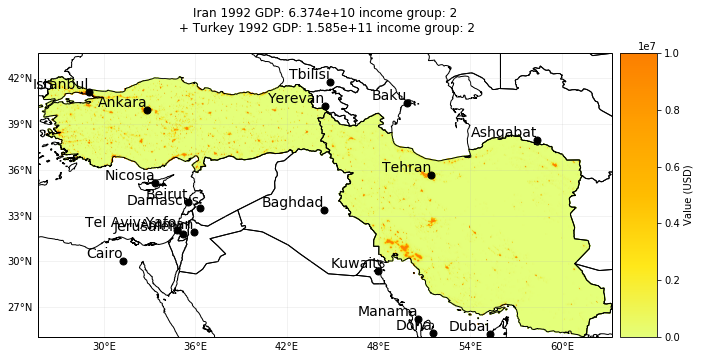

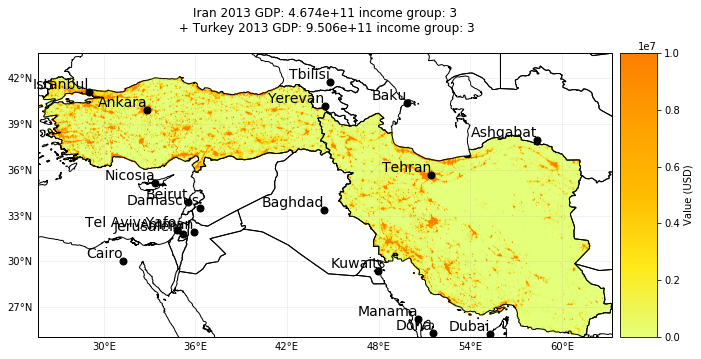

In [1]:
%matplotlib inline
from climada.entity import BlackMarble

irn_tur = BlackMarble()
irn_tur.set_countries(['Iran', 'Turkey'], 1992, res_km=1.0)
irn_tur.plot(vmax=1e7)

irn_tur = BlackMarble()
irn_tur.set_countries(['Iran', 'Turkey'], 2013, res_km=1.0)
irn_tur.plot(vmax=1e7)

Higher resolution is obtained by interpolating the night lights. If the resolution (parameter `res_km`) is not provided, the resolution of the nightlight images is going to be used.

2018-11-11 14:15:35,924 - climada.entity.exposures.black_marble - INFO - GDP CHE 2013: 6.885e+11.
2018-11-11 14:15:36,002 - climada.entity.exposures.black_marble - INFO - Income group CHE 2013: 4.
2018-11-11 14:15:36,003 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2018-11-11 14:15:36,176 - climada.entity.exposures.black_marble - INFO - Processing country Switzerland.
2018-11-11 14:15:36,330 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.3 km.
2018-11-11 14:15:37,763 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:15:37,763 - climada.util.checker - DEBUG - Exposures.cover not set. 
2018-11-11 14:15:37,764 - climada.util.checker - DEBUG - Exposures.category_id not set. 
2018-11-11 14:15:37,764 - climada.util.checker - DEBUG - Exposures.assigned not set. 
2018-11-11 14:15:49,656 - climada.entity.exposures.black_marble - INFO - GDP CHE 2013: 6.885e+11.
2018-

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a1b3dd908>]],
       dtype=object))

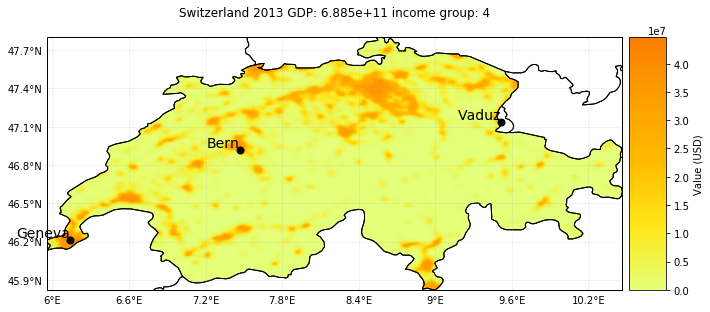

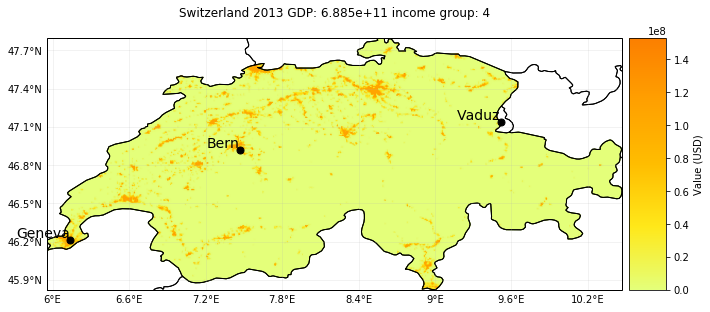

In [2]:
che = BlackMarble()
che.set_countries(['Switzerland'], 2013, res_km=0.3)
che.plot()

# use the NASA files (only available for 2012 and 2016) to interpolate from higher resolution
che = BlackMarble()
che.set_countries(['Switzerland'], 2013, res_km=0.3, from_hr=True)
che.plot()

2018-11-11 14:16:36,558 - climada.entity.exposures.black_marble - INFO - GDP CHN 2013: 9.607e+12.
2018-11-11 14:16:36,608 - climada.entity.exposures.black_marble - INFO - Income group CHN 2013: 3.
2018-11-11 14:16:36,609 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2018-11-11 14:16:36,755 - climada.entity.exposures.black_marble - INFO - Processing country China.
2018-11-11 14:17:05,600 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 5.0 km.
2018-11-11 14:17:08,152 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:17:08,153 - climada.util.checker - DEBUG - Exposures.cover not set. 
2018-11-11 14:17:08,153 - climada.util.checker - DEBUG - Exposures.category_id not set. 
2018-11-11 14:17:08,154 - climada.util.checker - DEBUG - Exposures.assigned not set. 


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a1eb68198>]],
       dtype=object))

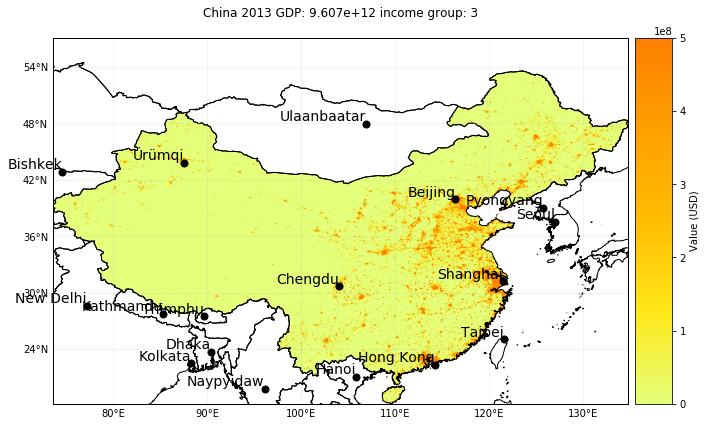

In [3]:
chn = BlackMarble()
chn.set_countries(['China'], 2013, res_km=5.0)
chn.plot(vmax=5e8)

Sea points can be added with the desired resolution. Their value will be 0.

2018-11-11 14:17:26,923 - climada.entity.exposures.black_marble - INFO - GDP AUS 2013: 1.574e+12.
2018-11-11 14:17:26,976 - climada.entity.exposures.black_marble - INFO - Income group AUS 2013: 4.
2018-11-11 14:17:26,977 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2018-11-11 14:17:27,126 - climada.entity.exposures.black_marble - INFO - Processing country Australia.
2018-11-11 14:17:44,160 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 2.0 km.
2018-11-11 14:17:52,596 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:17:52,597 - climada.util.checker - DEBUG - Exposures.cover not set. 
2018-11-11 14:17:52,597 - climada.util.checker - DEBUG - Exposures.category_id not set. 
2018-11-11 14:17:52,597 - climada.util.checker - DEBUG - Exposures.assigned not set. 
2018-11-11 14:17:52,636 - climada.entity.exposures.black_marble - INFO - Adding sea at 10 km resolution a

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x118ab3710>]],
       dtype=object))

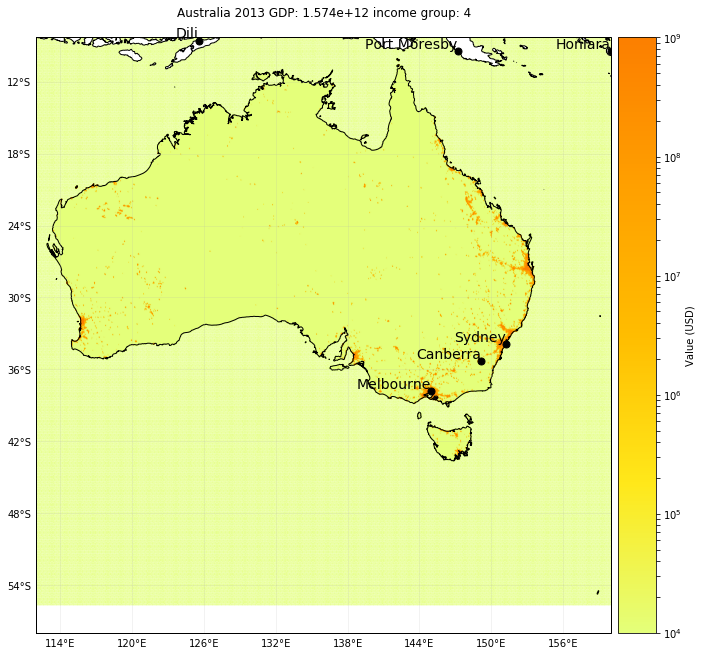

In [4]:
aus = BlackMarble()
aus.set_countries(['Australia'], 2013, res_km=2.0, sea_res=(100, 10))
from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e4, vmax=1.0e9)
aus.plot(norm=norm)

If you don't write the country name right, the error log will provide you with possible similar options.

2018-11-11 14:18:34,708 - climada.entity.exposures.black_marble - ERROR - Country Hong Kong not found. Possible options: ['Hong Kong S.A.R.']
Error caught.
2018-11-11 14:18:35,888 - climada.entity.exposures.black_marble - INFO - GDP HKG 2016: 3.209e+11.
2018-11-11 14:18:35,939 - climada.entity.exposures.black_marble - INFO - Income group HKG 2016: 4.
2018-11-11 14:18:35,939 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2018-11-11 14:18:35,944 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2018-11-11 14:18:35,944 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads neccessary.
2018-11-11 14:18:43,171 - climada.entity.exposures.black_marble - INFO - Processing country Hong Kong S.A.R..
2018-11-11 14:18:43,187 - climada.entity.exposures.black_marble - INFO - Generating resolu

/Users/aznarsig/anaconda3/envs/climada/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


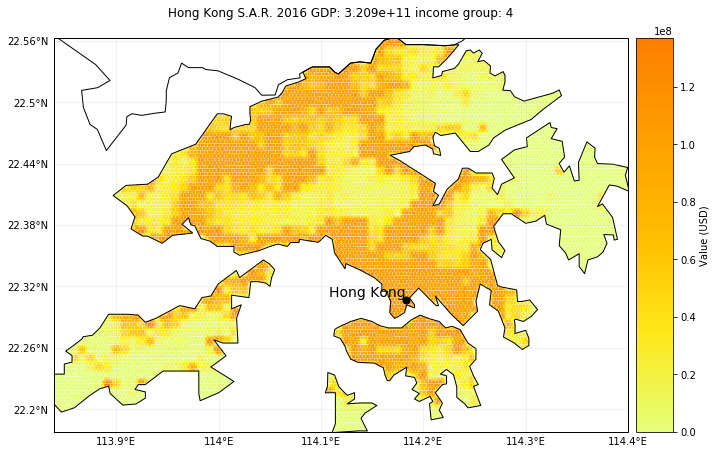

In [5]:
hkg = BlackMarble()
try:
    hkg.set_countries(['Hong Kong'], 2016, res_km=0.2)
except ValueError:
    print('Error caught.')
    hkg.set_countries(['Hong Kong S.A.R.'], 2016, res_km=0.2)
    hkg.plot(gridsize=500)

The GDP and income group can be given as inputs. Void values will indicate that the ones computed by Black Marble are used.

2018-11-11 14:18:47,054 - climada.entity.exposures.black_marble - INFO - GDP ARG: 5.000e+11.
2018-11-11 14:18:47,055 - climada.entity.exposures.black_marble - INFO - Income group ARG: 3.
2018-11-11 14:18:47,055 - climada.entity.exposures.black_marble - INFO - GDP URY: 5.000e+10.
2018-11-11 14:18:47,056 - climada.entity.exposures.black_marble - INFO - Income group URY: 4.
2018-11-11 14:18:47,056 - climada.entity.exposures.black_marble - INFO - Nightlights from NOAA's earth observation group for year 2013.
2018-11-11 14:18:47,204 - climada.entity.exposures.black_marble - INFO - Processing country Argentina.
2018-11-11 14:18:55,421 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 1.0 km.
2018-11-11 14:18:55,629 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:18:55,629 - climada.util.checker - DEBUG - Exposures.cover not set. 
2018-11-11 14:18:55,630 - climada.util.checker - DEBUG - Exposures.category_id not set. 
2018-11-11 14:

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a200a9550>]],
       dtype=object))

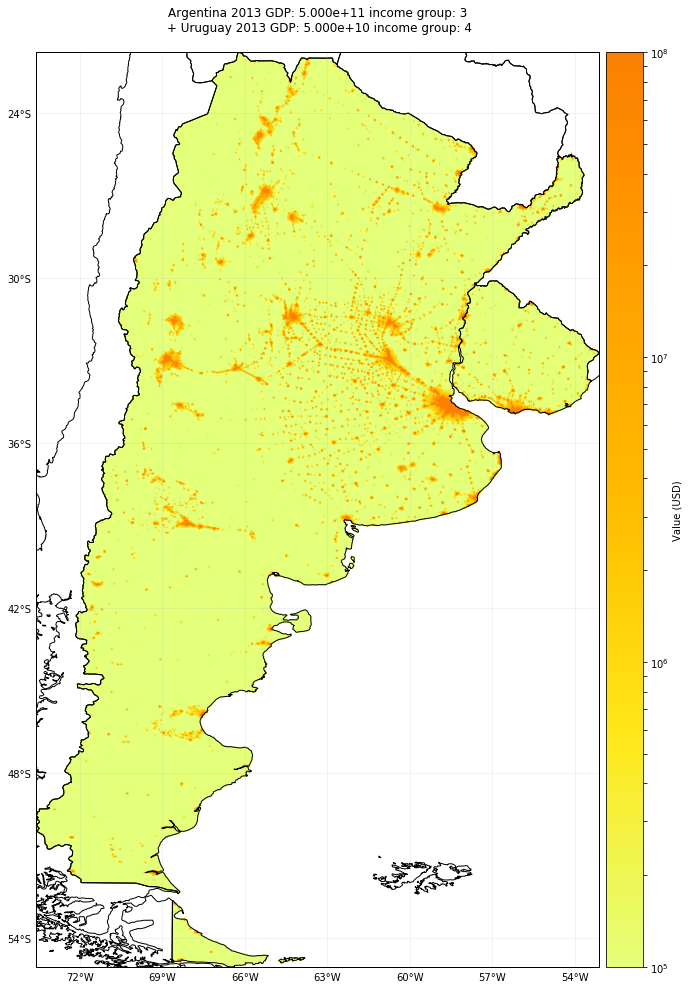

In [6]:
au = BlackMarble()
au.set_countries(['Argentina', 'Uruguay'], 2013, res_km=1.0, gdp={'ARG': 5e11, 'URY': 5e10}, inc_grp={'ARG': 3, 'URY': 4})
norm=colors.LogNorm(vmin=1.0e5, vmax=1.0e8)
au.plot(pop_name=False, norm=norm)

Finally, also provinces can be modelled using the country data as follows:

2018-11-11 14:19:56,910 - climada.entity.exposures.black_marble - INFO - GDP DEU 2012: 3.544e+12.
2018-11-11 14:19:56,982 - climada.entity.exposures.black_marble - INFO - Income group DEU 2012: 4.
2018-11-11 14:19:57,570 - climada.entity.exposures.black_marble - INFO - GDP CZE 2012: 2.074e+11.
2018-11-11 14:19:57,627 - climada.entity.exposures.black_marble - INFO - Income group CZE 2012: 4.
2018-11-11 14:19:57,628 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2018-11-11 14:19:57,661 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2018-11-11 14:19:57,662 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads neccessary.
2018-11-11 14:20:10,655 - climada.entity.exposures.black_marble - INFO - Processing country Germany.
2018-11-11 14:20:14,507 - climada.entity.exposures.black_m

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a200a9e10>]],
       dtype=object))

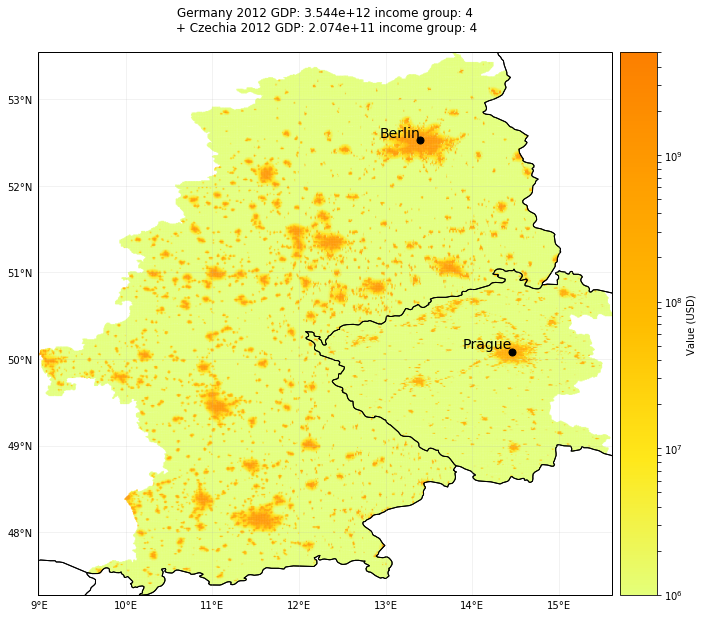

In [7]:
country_name = {'Germany': ['Berlin', 'Brandenburg', 'Bayern', 'Sachsen', 'Thüringen', 'Sachsen-Anhalt'],
                'Czechia': ['Prague', 'Karlovarský', 'Ústecký', 'Liberecký', 'Středočeský', 'Plzeňský', 'Jihočeský']}

ent = BlackMarble()
ent.set_countries(country_name, 2012, res_km=1.0, from_hr=True)

from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e6, vmax=5.0e9)
ent.plot(norm=norm)

Countries with oversea territories might take longer to compute. The USA using 0.5km resolution might take longer... (10min approx)

2018-11-11 14:20:33,302 - climada.entity.exposures.black_marble - INFO - GDP USA 2017: 1.939e+13.
2018-11-11 14:20:33,357 - climada.entity.exposures.black_marble - INFO - Income group USA 2017: 4.
2018-11-11 14:20:33,357 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2016.
2018-11-11 14:20:34,052 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (4 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2018-11-11 14:20:34,052 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads neccessary.
2018-11-11 14:24:24,289 - climada.entity.exposures.black_marble - INFO - Processing country United States Of America.
2018-11-11 14:30:20,135 - climada.entity.exposures.black_marble - INFO - Generating resolution of approx 0.5 km.
2018-11-11 14:30:20,844 - climada.util.checker - DEBUG - Exposures.deductible not set. 
2018-11-11 14:30:20,845 - climada.uti

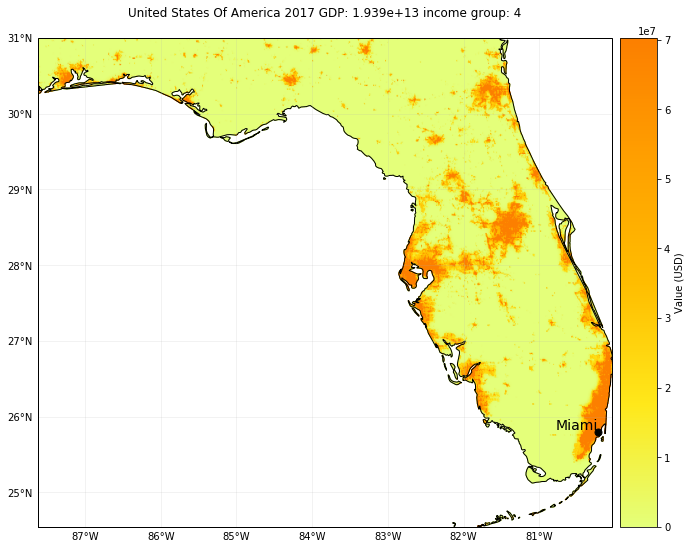

In [8]:
country_name = {'United States Of America': ['Florida']}

flr = BlackMarble()
flr.set_countries(country_name, 2017)
flr.plot()
print('Number of points:', flr.size)

The polynomial transformation used in the nightlight intensity can be also set through the parameter `poly_val`. The default transformation is x^2; not transforming the intensities has this result:

2018-11-11 14:30:48,328 - climada.entity.exposures.black_marble - INFO - GDP DEU 2012: 3.544e+12.
2018-11-11 14:30:48,431 - climada.entity.exposures.black_marble - INFO - Income group DEU 2012: 4.
2018-11-11 14:30:49,148 - climada.entity.exposures.black_marble - INFO - GDP CZE 2012: 2.074e+11.
2018-11-11 14:30:49,197 - climada.entity.exposures.black_marble - INFO - Income group CZE 2012: 4.
2018-11-11 14:30:49,197 - climada.entity.exposures.black_marble - INFO - Nightlights from NASA's earth observatory for year 2012.
2018-11-11 14:30:49,227 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/aznarsig/Documents/Python/climada_python/data/system
2018-11-11 14:30:49,228 - climada.entity.exposures.nightlight - DEBUG - All required files already exist. No downloads neccessary.
2018-11-11 14:30:59,509 - climada.entity.exposures.black_marble - INFO - Processing country Germany.
2018-11-11 14:31:03,307 - climada.entity.exposures.black_m

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a5f563c18>]],
       dtype=object))

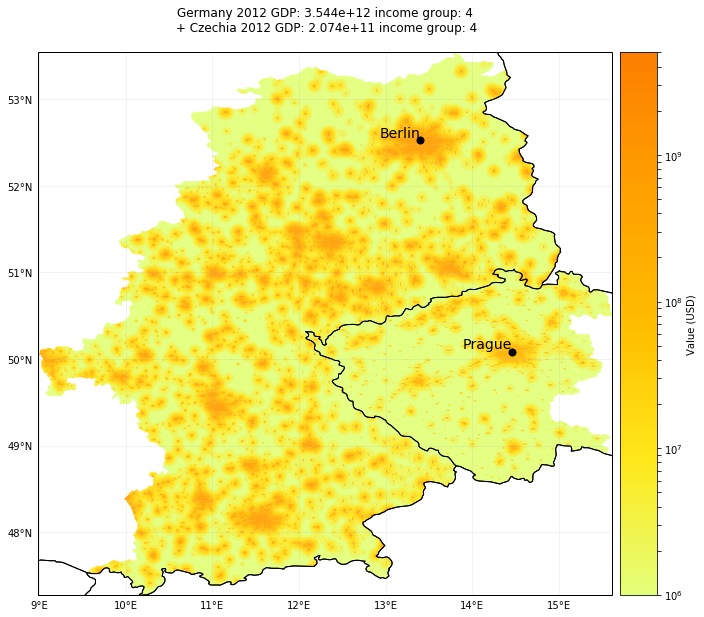

In [9]:
country_name = {'Germany': ['Berlin', 'Brandenburg', 'Bayern', 'Sachsen', 'Thüringen', 'Sachsen-Anhalt'],
                'Czechia': ['Prague', 'Karlovarský', 'Ústecký', 'Liberecký', 'Středočeský', 'Plzeňský', 'Jihočeský']}

ent = BlackMarble()
# linear transformation
ent.set_countries(country_name, 2012, res_km=1.0, from_hr=True, poly_val=[0, 1])

from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e6, vmax=5.0e9)
ent.plot(norm=norm)